# Data Scientist Professional Practical Exam Submission


## Data Validation
_This data has 1990 rows, 8 columns. I have validated all variables and made several changes after validation as multiple columns are not as described in the data dictionary:_

- clinic_id: I ensured that all variables were of the discrete type. There were multiple duplicates, but I didn't remove any variables to preserve the data
- ownership: there were some typos where 'non-profitt' was written instead of 'Non-Profit'. I ensured only three outpus: Non-Profit, Public, and For Profit and converted the type to categorical.
- hospital_location: I ensured the data type was categorical and only included urban and rural, I assigned mode to any records from rows that did not have a hospital location
- admitted_patients: I assigned these variables the integer or discrete data type and verified that there were no negatives, no other transformations needed
- nurse_patient_ratio: I verified that all of this data fell between 0 and 1 and that the data type was assigned to float; no other transformations needed
- ed_visits: I found multiple negative values, and converted all negative values to positive using the absolute value function. I verified that this column was assigned the 'int' type.
- satisfaction_score: I validated that all of the satisfaction scores fell within 1 and 10, and assigned the mean any records for scores that were missing. Then, I assigned the continuous or 'float' type to the column.
- revenue: I assigned the revenue column to the 'float' type and ensured only 2 decimal places for each.

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('health_revenue.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1831 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


In [3]:
df.head()

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
0,1847,Profit,Urban,23,0.40,12,2.04,55684.18
1,422,Profit,Urban,22,0.60,11,2.77,117115.85
2,1843,Public,Rural,47,0.37,31,3.13,72794.56
3,14,Non-Profit,Urban,20,0.06,47,1.30,87447.23
4,1880,Public,Rural,33,0.94,40,5.90,88848.01


In [4]:
#validate values as discrete variables
df=df.astype({"clinic_id": 'int64'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1831 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


In [5]:
#validate three types of ownership
df['ownership'].unique()

#transform non-profit to categorical data type, replace non-profitt with non-profit
df["ownership"]=df["ownership"].replace('non_profitt', 'Non-Profit')
df=df.astype({"ownership": 'category'})
df['ownership'].unique()

['Profit', 'Public', 'Non-Profit']
Categories (3, object): ['Non-Profit', 'Profit', 'Public']

In [6]:
#validate three hospital locations and convert to categorical type
df.replace('-', np.nan, inplace=True)
df['hospital_location'].fillna(value=df['hospital_location'].mode()[0], inplace=True)
df=df.astype({"hospital_location": 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   clinic_id            1990 non-null   int64   
 1   ownership            1990 non-null   category
 2   hospital_location    1990 non-null   category
 3   admitted_patients    1990 non-null   int64   
 4   nurse_patient_ratio  1990 non-null   float64 
 5   ed_visits            1990 non-null   int64   
 6   satisfaction_score   1831 non-null   float64 
 7   revenue              1990 non-null   float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 97.5 KB


In [7]:
#validate any negative values in numeric variables
df.describe()

,clinic_id,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1990.000000,1990.000000,1990.000000,1990.000000,1831.000000,1990.000000
mean,997.214070,25.400503,0.503251,23.250251,4.515418,88076.974523
std,577.514303,14.144905,0.285727,16.373214,2.753724,29644.679778
min,0.000000,1.000000,0.000000,-49.000000,1.000000,16432.280000
25%,491.250000,14.000000,0.250000,11.000000,2.190000,65186.840000
50%,1003.000000,25.000000,0.500000,24.000000,3.440000,88086.915000
75%,1497.750000,38.000000,0.750000,36.000000,7.110000,110556.667500
max,1989.000000,49.000000,1.000000,49.000000,9.990000,156115.420000


In [8]:
#remove negatives from ed_visits by taking absolute value of values
df['ed_visits']=df['ed_visits'].abs()

In [9]:
#address missing satisfaction scores by taking the mean (1990-1831 = 159)
df['satisfaction_score'] = df['satisfaction_score'].fillna(df['satisfaction_score'].mean())
#df['satisfaction_score']=df['satisfaction_score'].fillna(0).astype(float)
#i = df[(df['satisfaction_score']<1)].index
#df['satisfaction_score'] = df['satisfaction_score'].drop(i)
#df=df.drop(df[df['satisfaction_score']<1].index)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   clinic_id            1990 non-null   int64   
 1   ownership            1990 non-null   category
 2   hospital_location    1990 non-null   category
 3   admitted_patients    1990 non-null   int64   
 4   nurse_patient_ratio  1990 non-null   float64 
 5   ed_visits            1990 non-null   int64   
 6   satisfaction_score   1990 non-null   float64 
 7   revenue              1990 non-null   float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 97.5 KB


In [10]:
#ensure revenue is only 2 decimal places
df['revenue'].format='.2f'
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   clinic_id            1990 non-null   int64   
 1   ownership            1990 non-null   category
 2   hospital_location    1990 non-null   category
 3   admitted_patients    1990 non-null   int64   
 4   nurse_patient_ratio  1990 non-null   float64 
 5   ed_visits            1990 non-null   int64   
 6   satisfaction_score   1990 non-null   float64 
 7   revenue              1990 non-null   float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 97.5 KB


## Exploratory Analysis
I have investigated the target variable and features of the clinics / hospitals, and the relationship between target variable and features. 

### Target Variable - Revenue

Since we need to predict the revenue, the revenue variable would be our target variable. From the histogram below, we can see that this data resembles a normal distribution. Therefore, we do not need to apply any transformations to the revenue variable.

[Text(0.5, 1.0, 'The Distribution of Target Variable - Revenue')]

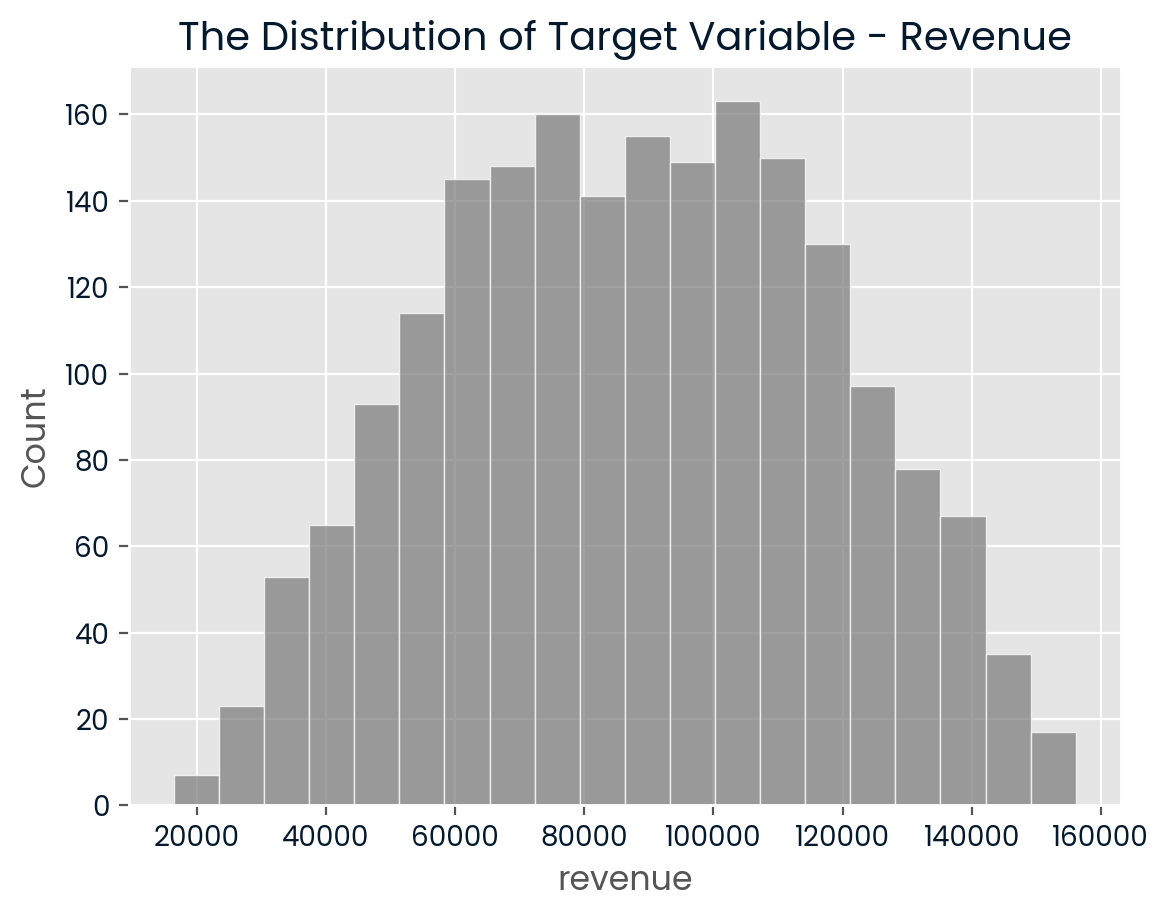

In [11]:
sns.histplot(df['revenue'],color='gray').set(title='The Distribution of Target Variable - Revenue')

### Numeric Variables - Admitted Patients, Nurse Patient Ratio, ED Visits, Satisfaction Score, and Revenue
From the heatmap below, we can conclude that there is a moderate linear relationship in two pairs of variables - ED Visits and Revenue; Satisfaction Score and Nurse Patient Ratio.

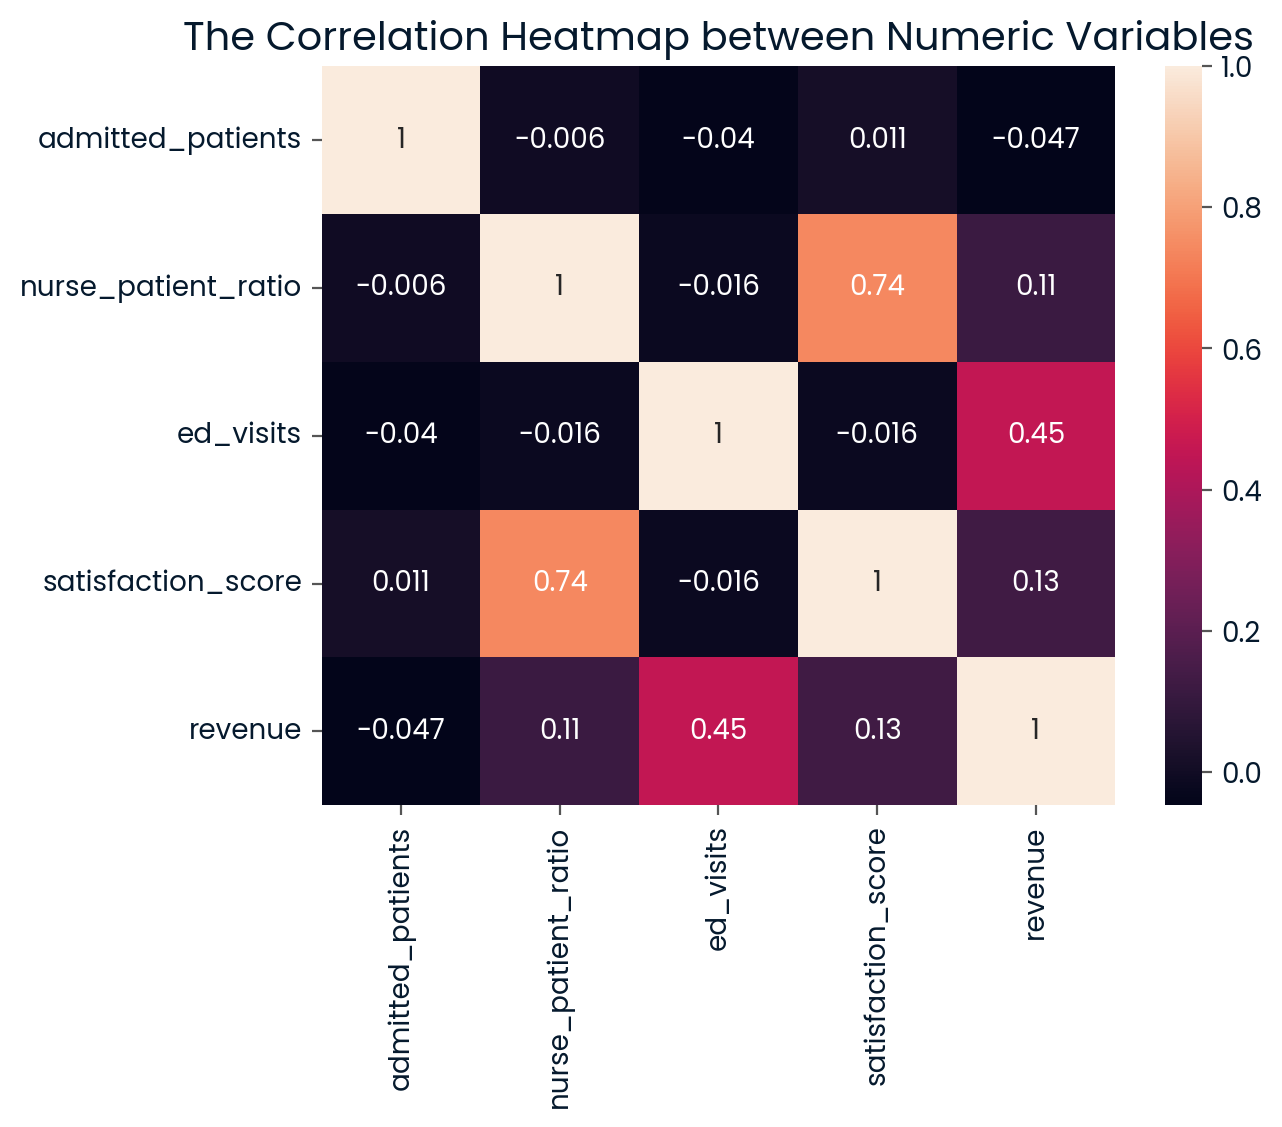

In [12]:
numeric = df[['admitted_patients','nurse_patient_ratio','ed_visits','satisfaction_score','revenue']]
sns.heatmap(numeric.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');

### Relationship between Admitted Patients, Nurse Patient Ratio, ED Visits, Satisfaction Score, and Revenue
To spot the other relationships, I decided to make scatterplot to further investigate the relationship between Admitted Patients, Nurse Patient Ratio, ED Visits, Satisfaction Score and our target varible - revenue. From the scatterplots below, there is linear relationship between ED Visits and revenue. No relationship between Admitted Patients and Nurse Patient Ratio. I found out there is clusters in the scatterplot between revenue and satisfaction score.

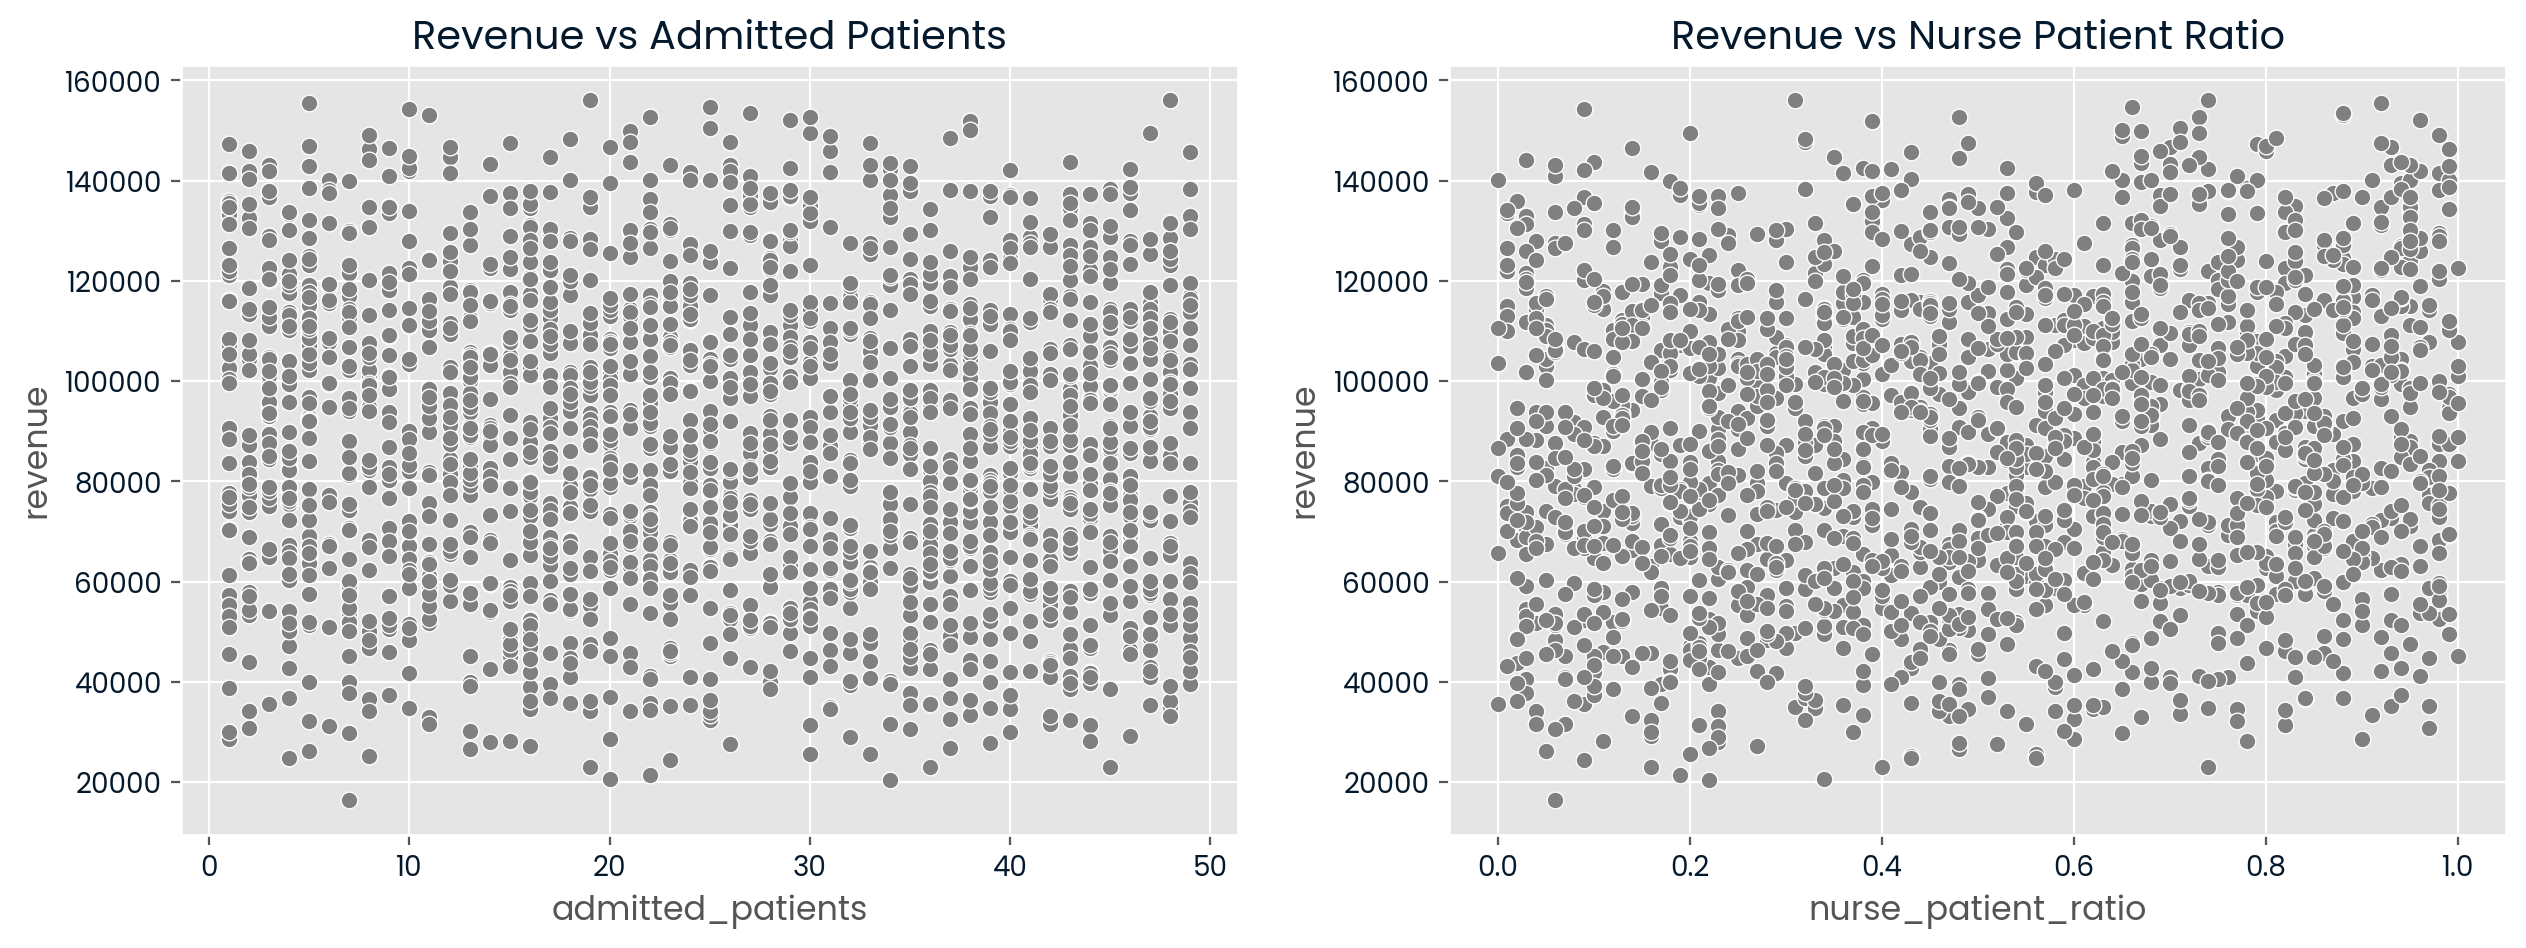

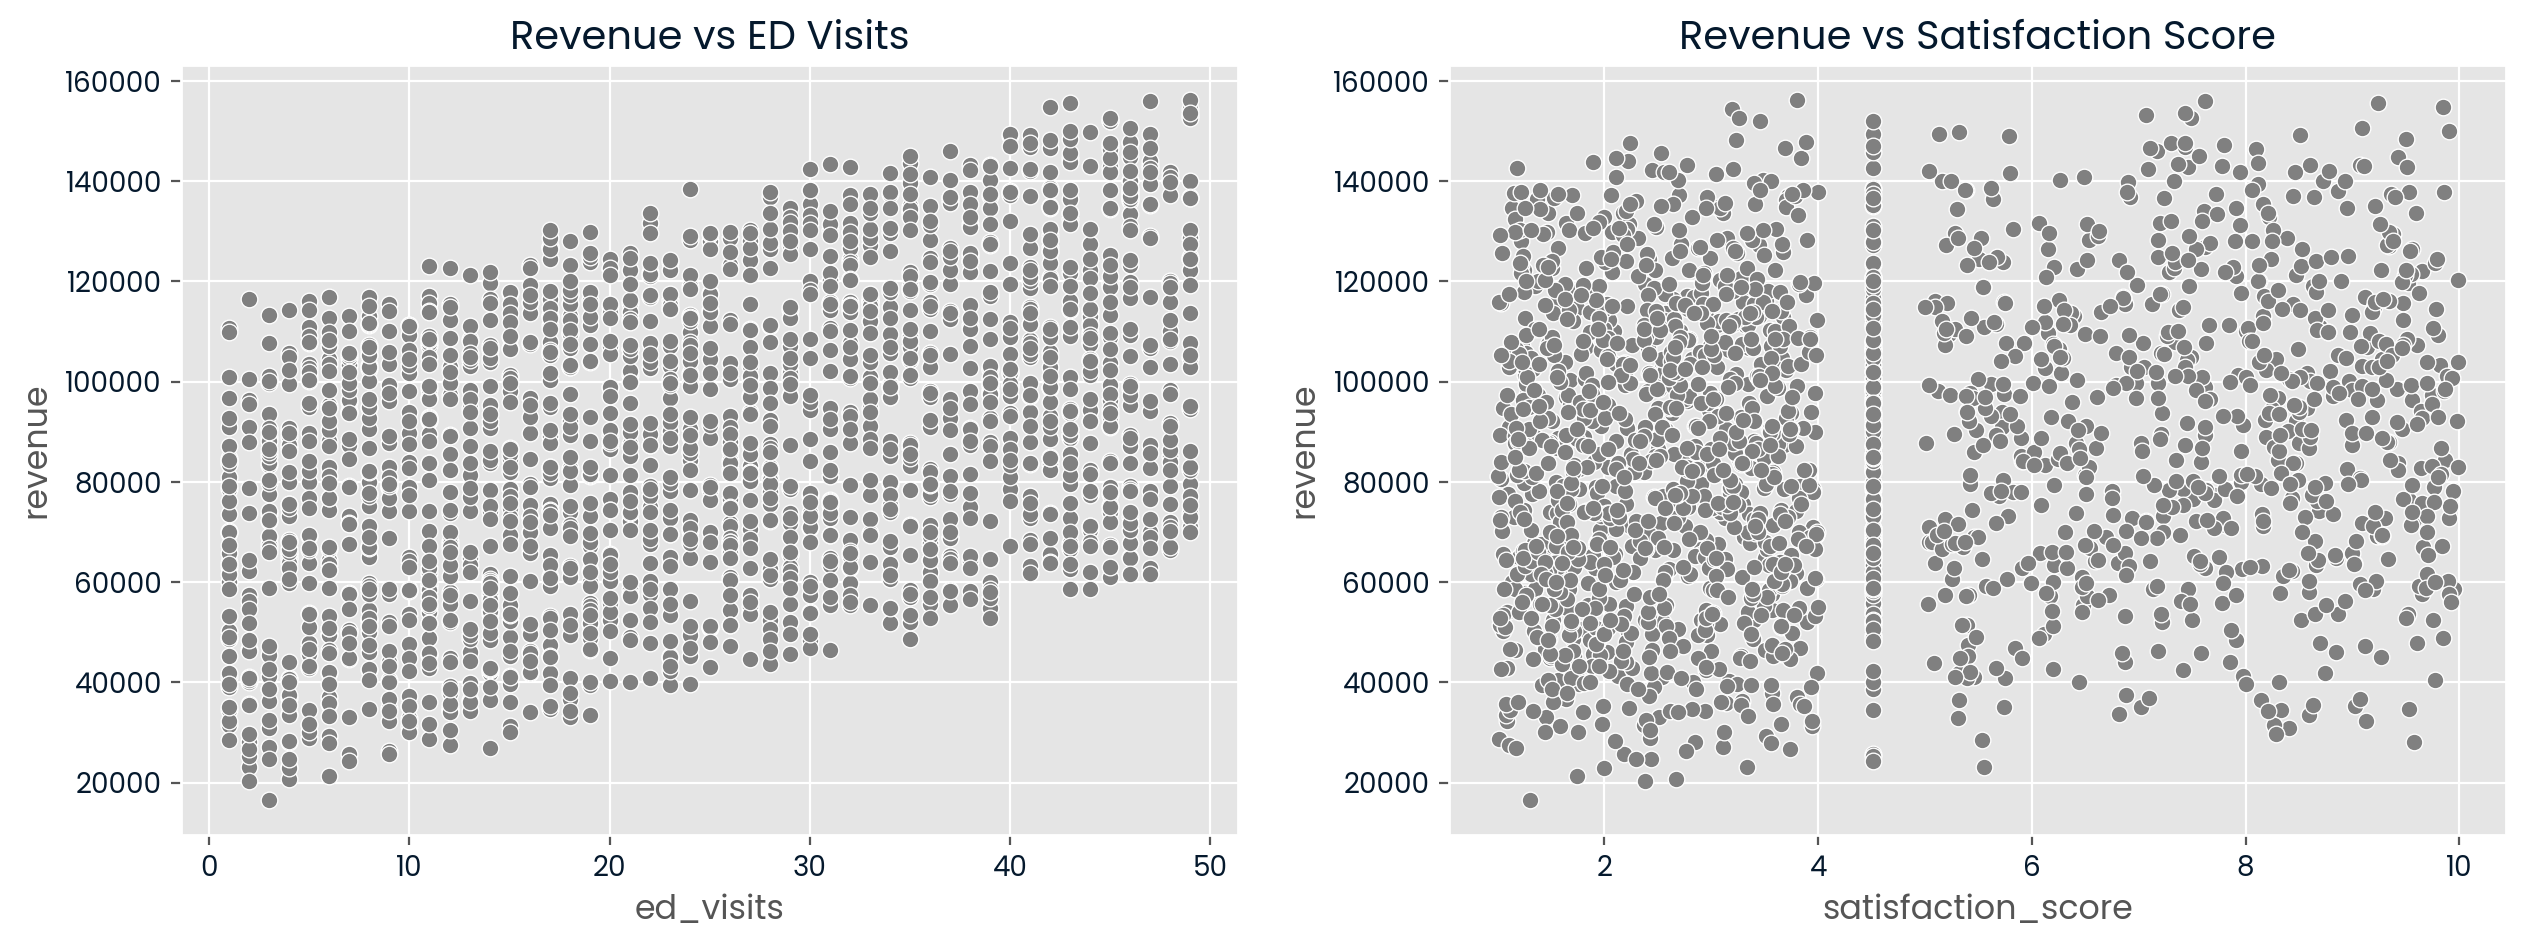

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(y=df['revenue'],x=df['admitted_patients'],color='gray',ax=axes[0]).set(title='Revenue vs Admitted Patients')
sns.scatterplot(y=df['revenue'],x=df['nurse_patient_ratio'],color='gray',ax=axes[1]).set(title='Revenue vs Nurse Patient Ratio')

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(y=df['revenue'],x=df['ed_visits'],color='gray',ax=axes[0]).set(title='Revenue vs ED Visits');
sns.scatterplot(y=df['revenue'],x=df['satisfaction_score'],color='gray',ax=axes[1]).set(title='Revenue vs Satisfaction Score');

### Categorical Variables - Ownership and Hospital Location
#### Characteristics about Ownership and Hospital Location
I checked the characteristics of our two categorical data - ownership and hospital location. From the bar chart below, the most common ownership type is Profit. Also, the most common hospital location in is Urban.

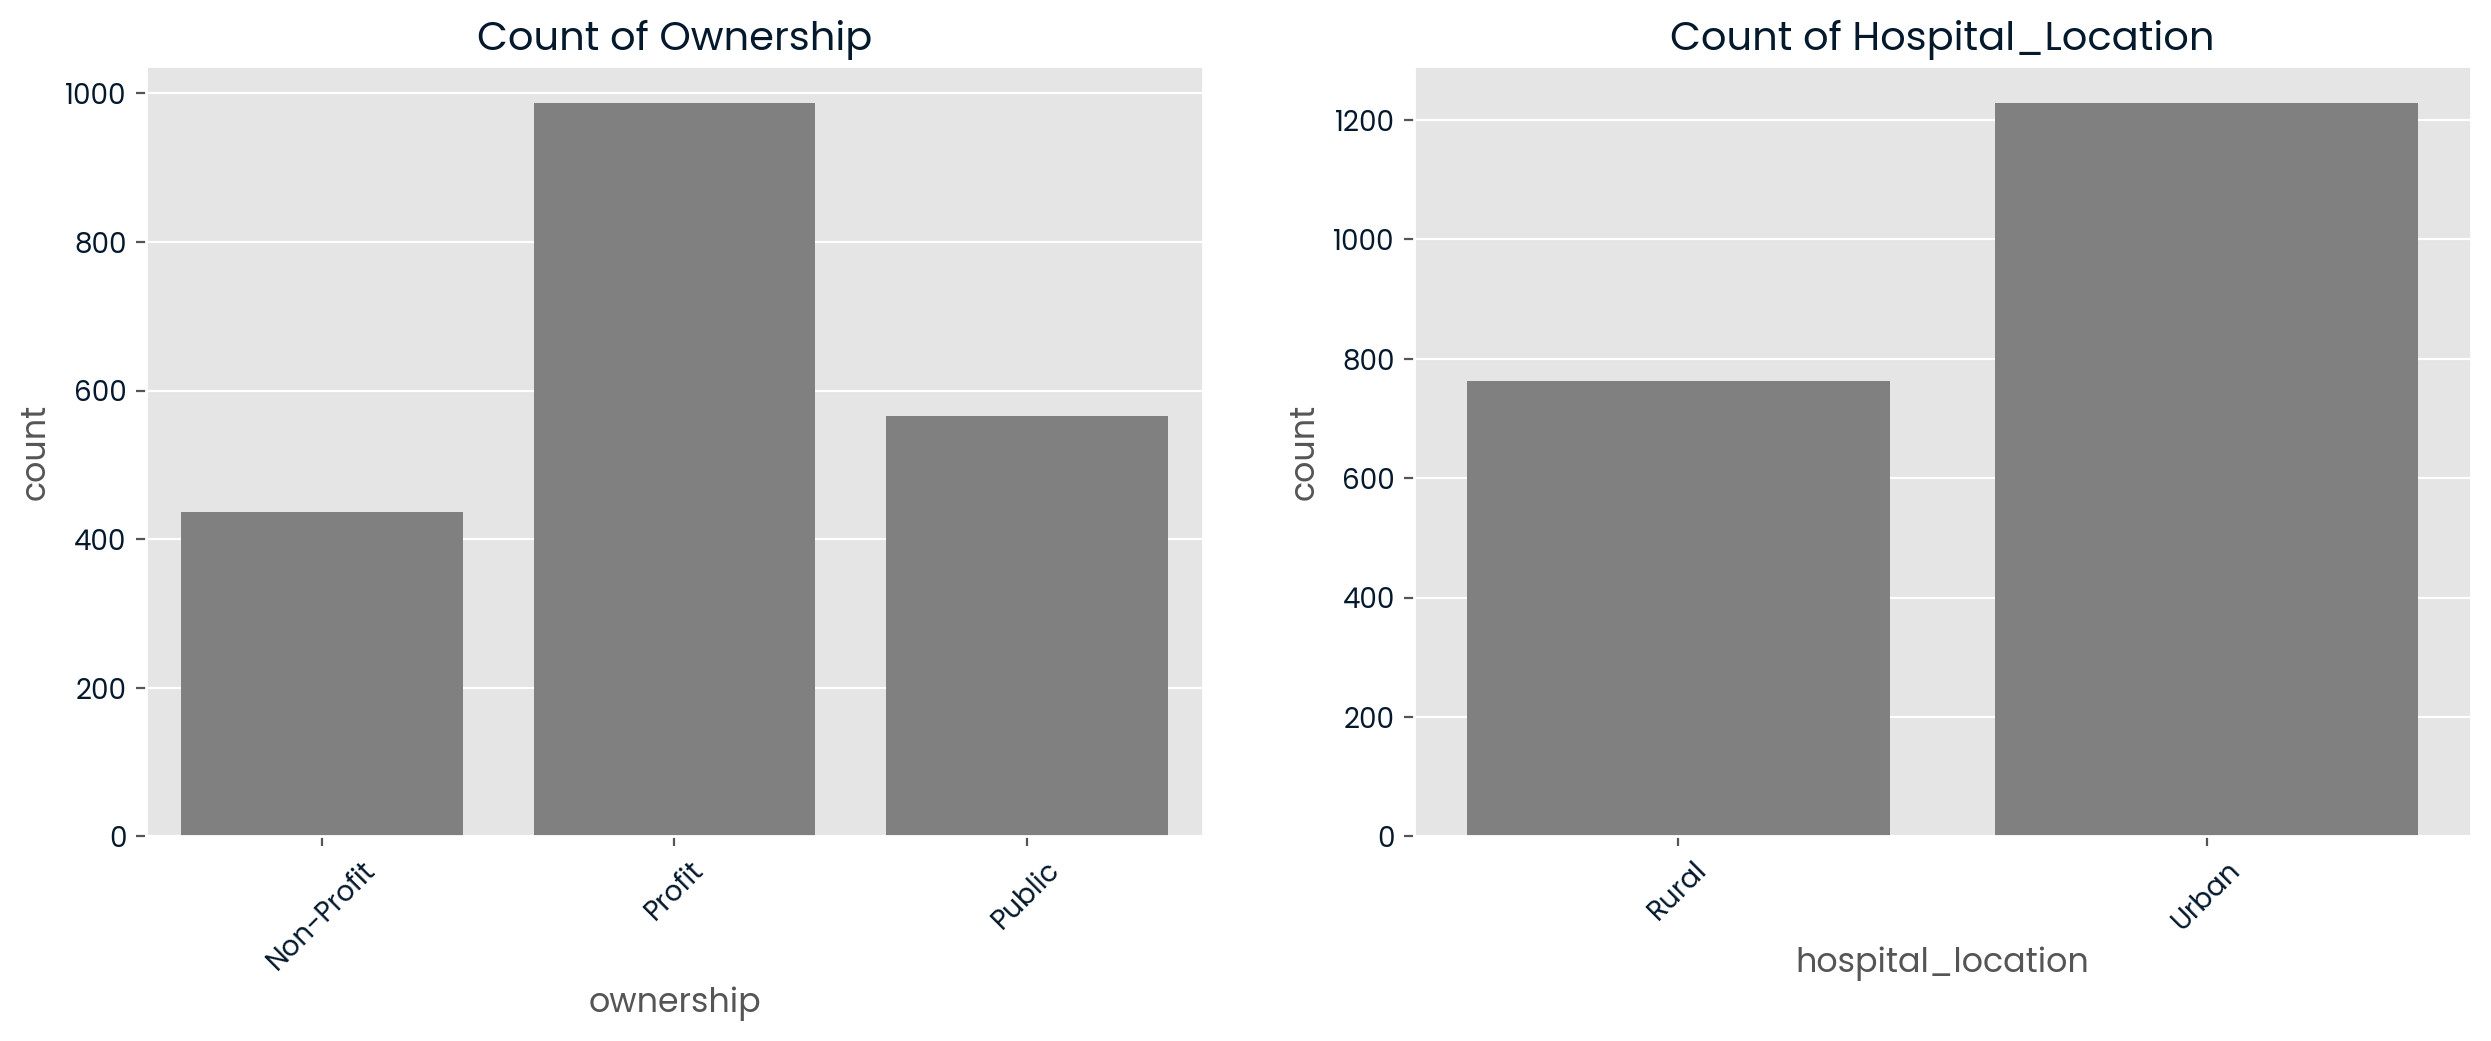

In [14]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['ownership'], color='gray',ax=axes[0]).set(title='Count of Ownership')
sns.countplot(x=df['hospital_location'],color='gray',ax=axes[1]).set(title='Count of Hospital_Location')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45);

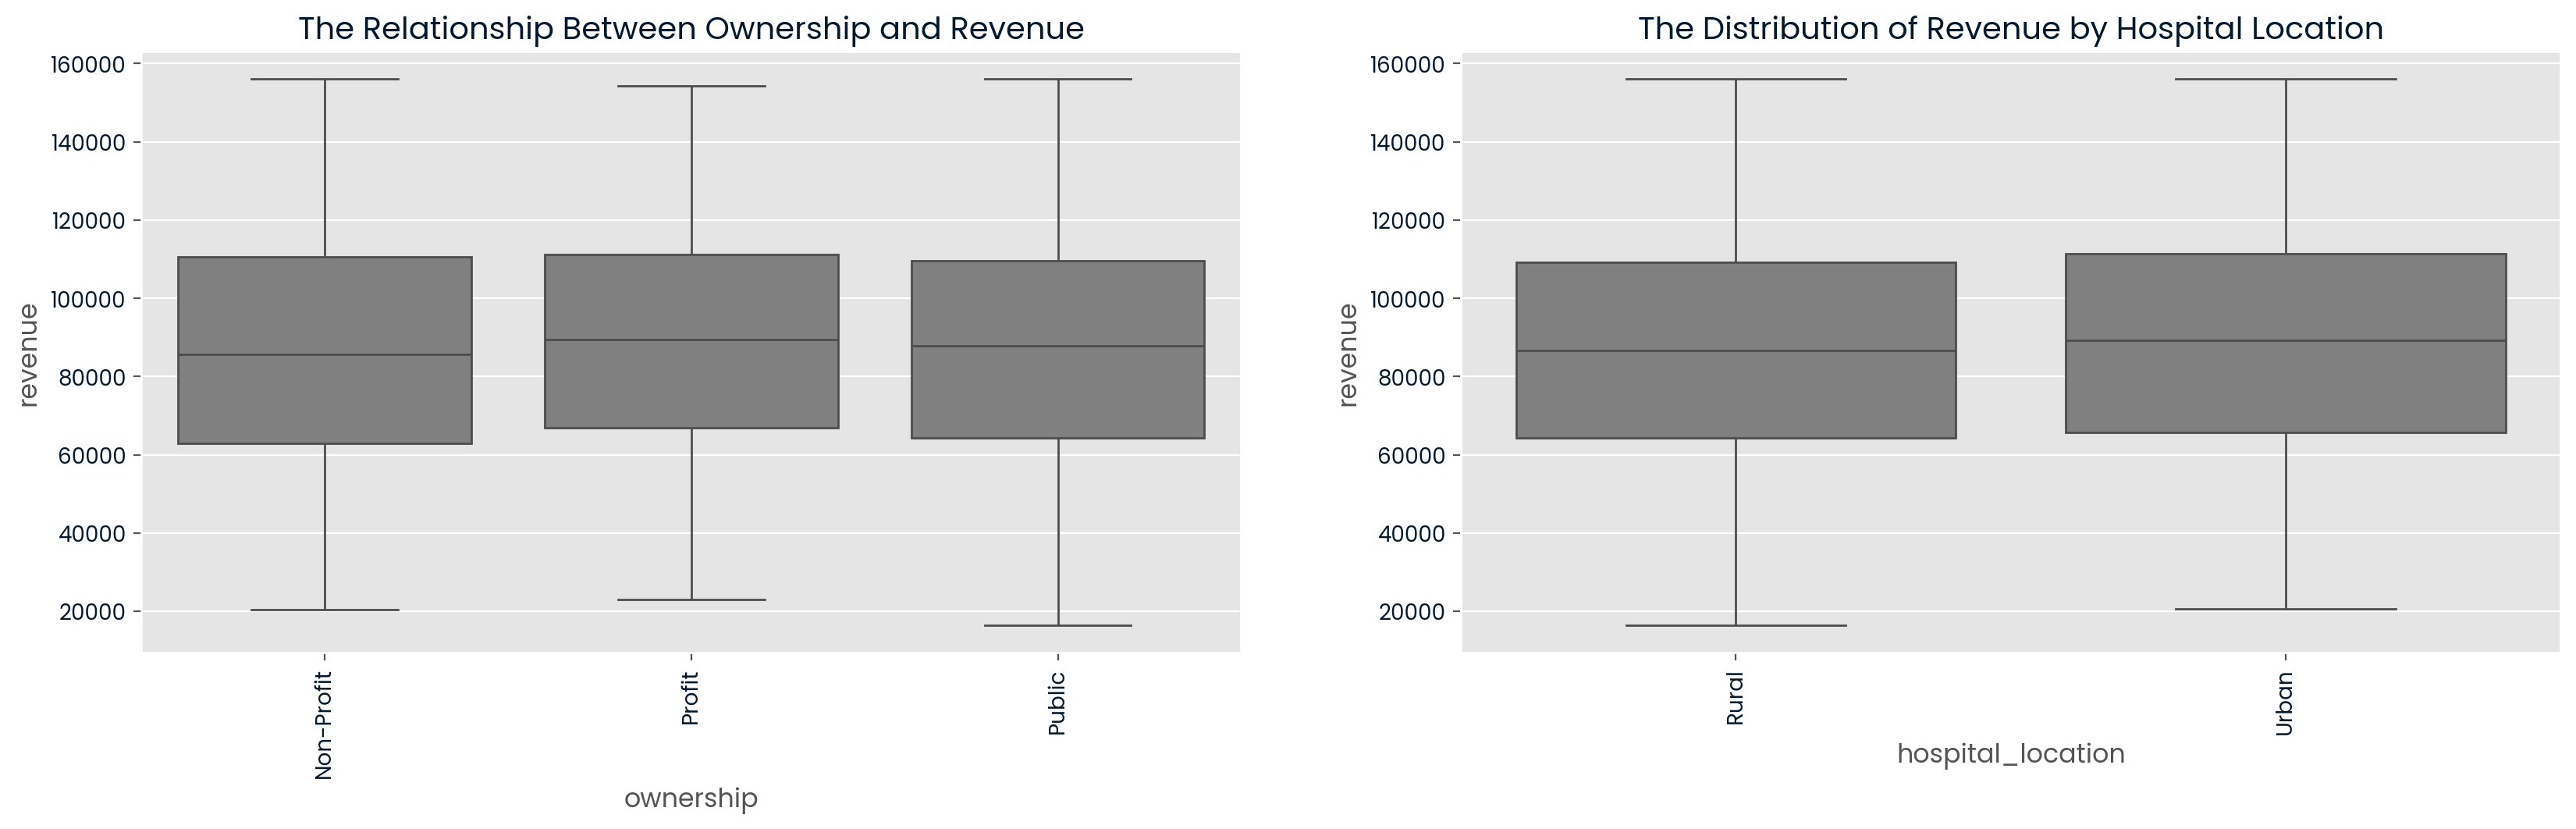

In [15]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data=df, x='ownership',y='revenue',color='gray', ax=axes[0]).set(title='The Relationship Between Ownership and Revenue')
sns.boxplot(data=df, x='hospital_location',y='revenue',color='gray', ax=axes[1]).set(title='The Distribution of Revenue by Hospital Location')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

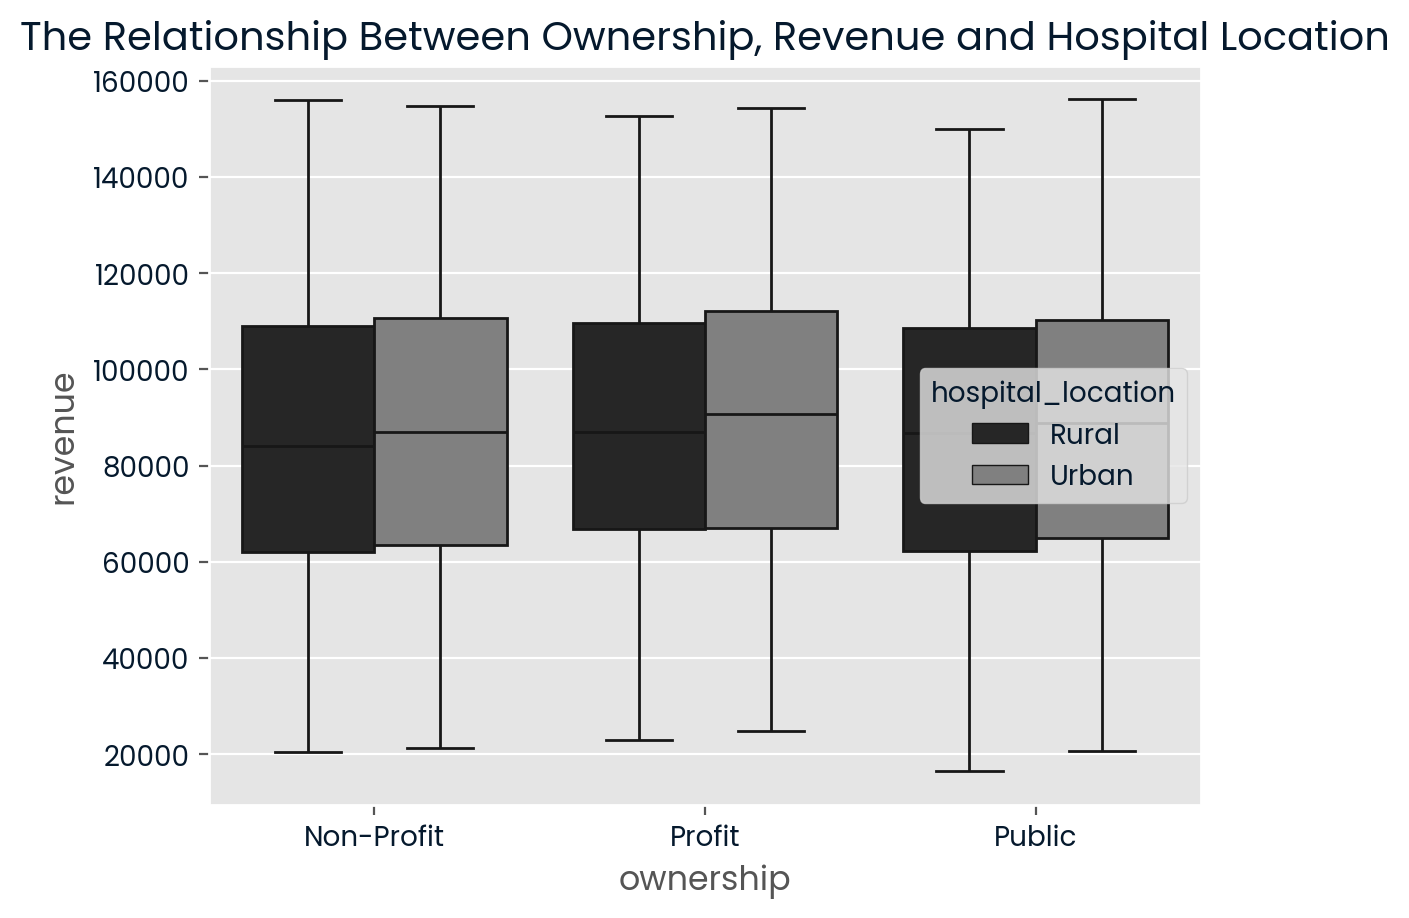

In [16]:
sns.boxplot(data=df, x='ownership',y='revenue',color='gray', hue='hospital_location').set(title='The Relationship Between Ownership, Revenue and Hospital Location');

## Model Fitting & Evaluation
Predicting the revenue is a regression problem in machine learning. I am choosing the Linear Regression model because we can see moderate relationship between some features and the target variable. The comparison model I am choosing is the Random Forest Regression model because of it's ability to reduce overfitting.

For the evaluation, I am choosing R squared, MAE (Mean Absolute Error), and MSE (Mean Squared Error) to evaluate the model. R squared measures how well the model fits dependent variables (i.e. features). MAE measures the average absolute error between predicted and actual values. MSE checks how close estimates or forecasts are to actual values.

### Prepare Data for Modelling
To enable modelling, I chose ownership, hospital location, admitted patients, nurse patient ratio, ED visits, and satisfaction score as features, revenue as target variables. I also have made the following changes:

- Normalize the numeric features
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

Baseline Model Metrics:
MAE: 21916.088275891252
MSE: 635764745.6444262
R-squared: 0.23951262196183287

Comparison Model Metrics:
MAE: 22730.639635929652
MSE: 701488453.7414654
R-squared: 0.16089541207706604

Baseline Revenue Accuracy Rate: 0.1984924623115578

comparison Revenue Accuracy Rate: 0.19095477386934673


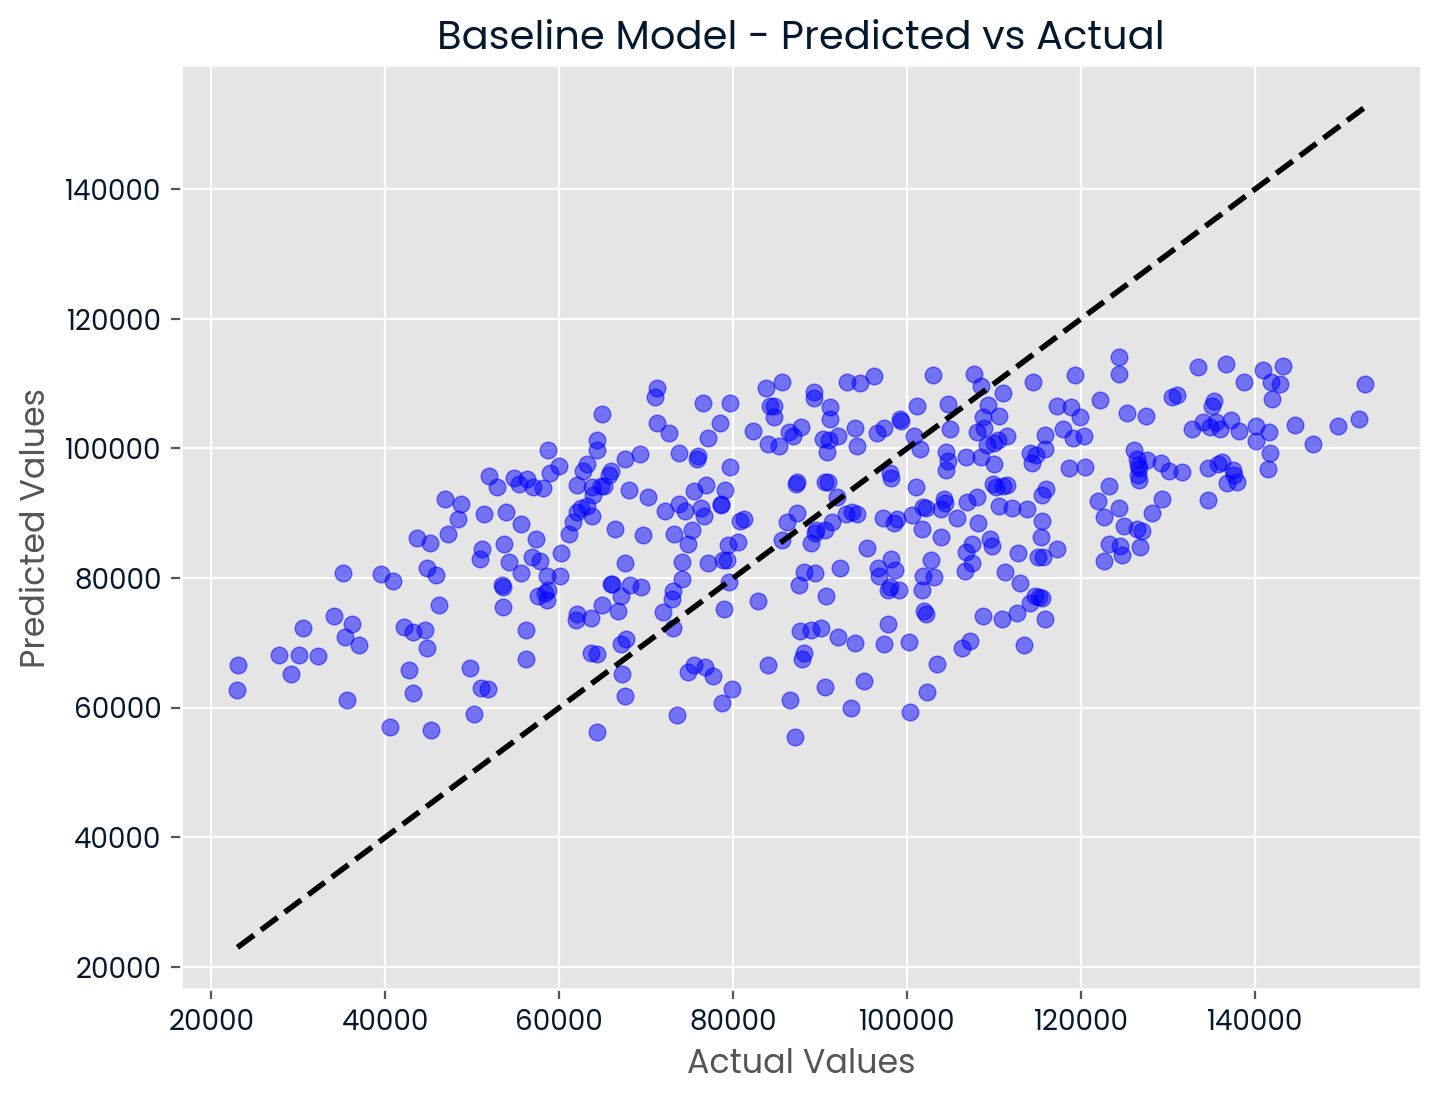

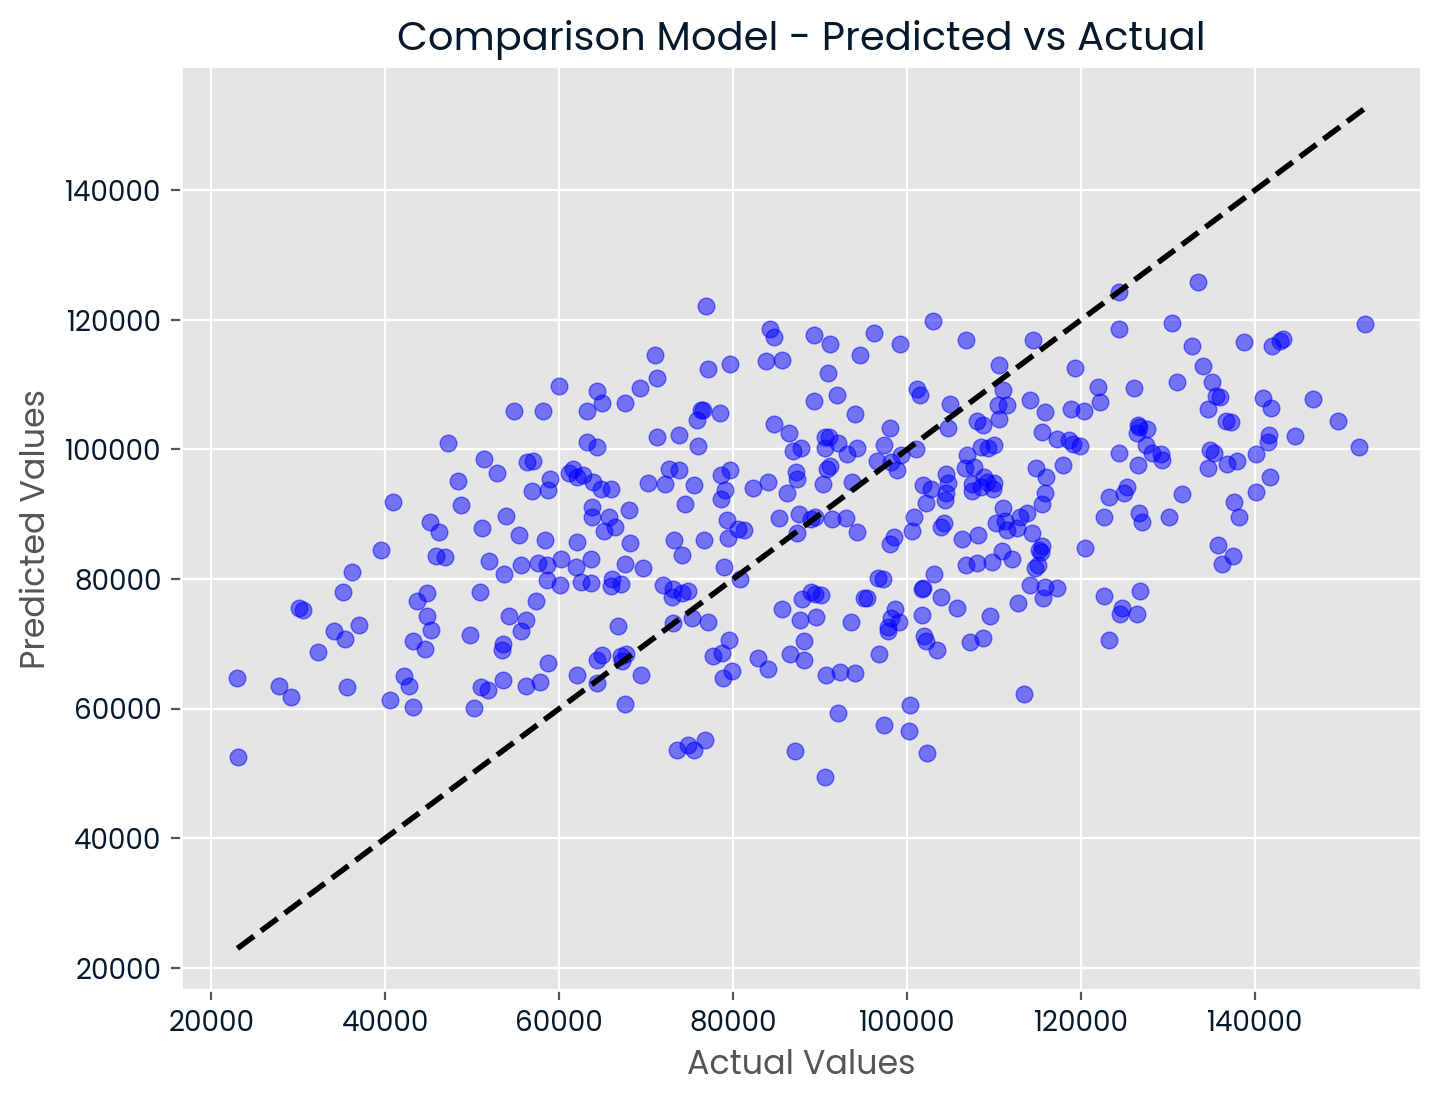

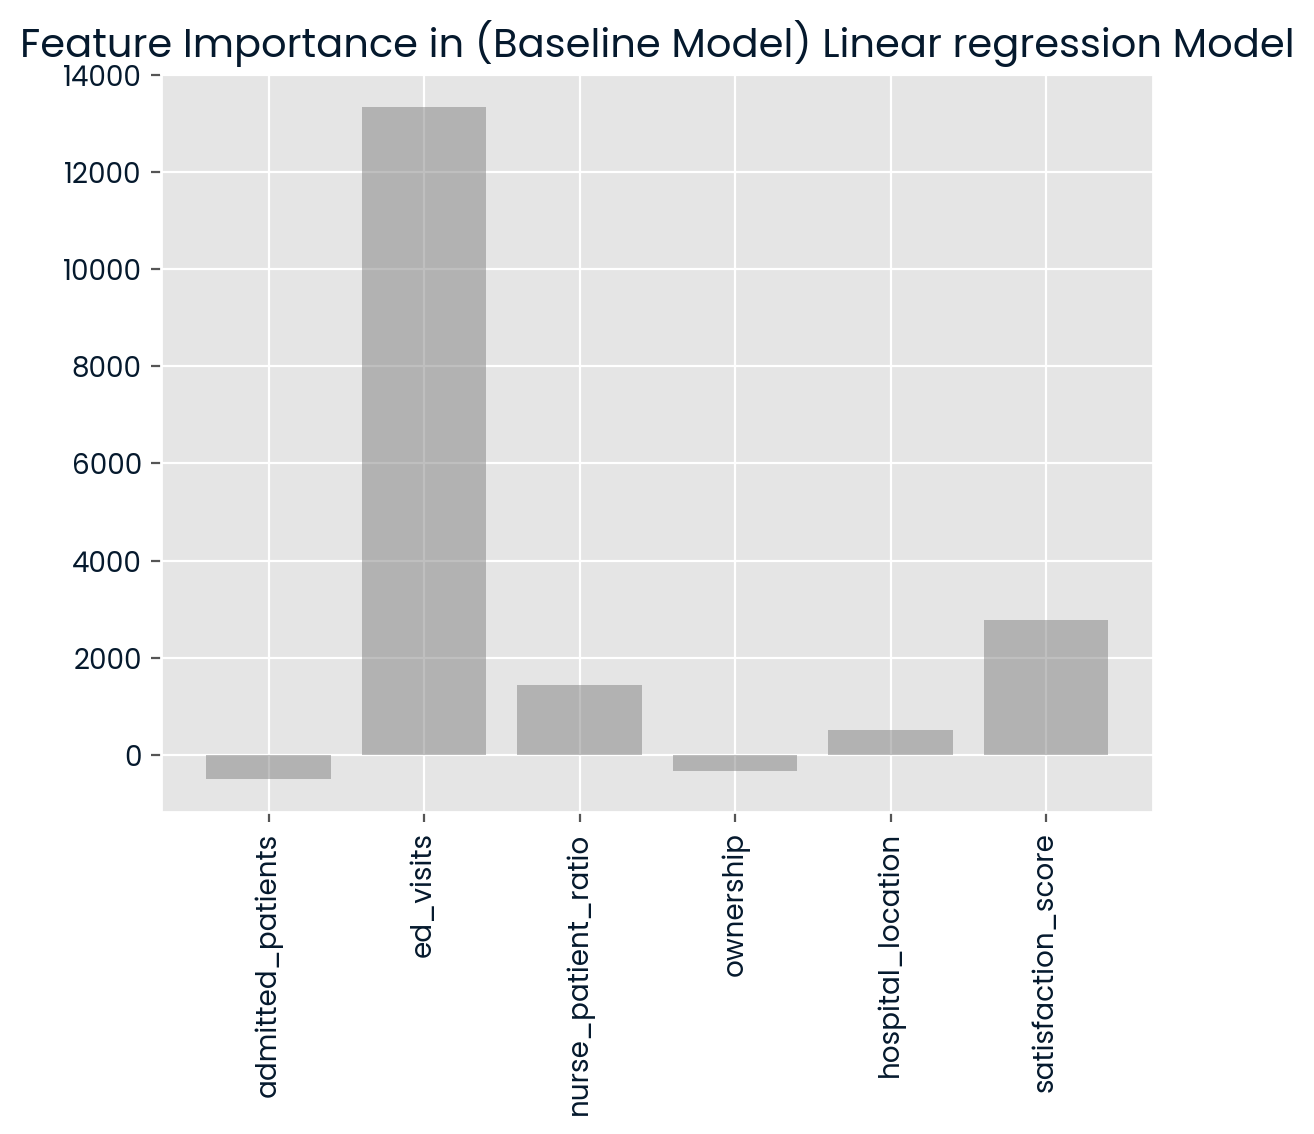

In [17]:
# Encoding categorical variables
le = LabelEncoder()
df['ownership'] = le.fit_transform(df['ownership'])
df['hospital_location'] = le.fit_transform(df['hospital_location'])

feature_cols = ['admitted_patients','ed_visits','nurse_patient_ratio','ownership','hospital_location','satisfaction_score']
X = df[feature_cols] # Features
y = df['revenue']

scaler = PowerTransformer()
# fit and transform the train set
X[['admitted_patients']] = scaler.fit_transform(X[['admitted_patients']])
X[['satisfaction_score']] = scaler.fit_transform(X[['satisfaction_score']])
X[['ed_visits']] = scaler.fit_transform(X[['ed_visits']])
X[['nurse_patient_ratio']] = scaler.fit_transform(X[['nurse_patient_ratio']])
X[['ownership']] = scaler.fit_transform(X[['ownership']])
X[['hospital_location']] = scaler.fit_transform(X[['hospital_location']])

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Baseline Model (Simple Linear Regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Comparison Model (Random Forest Regressor)
comparison_model = RandomForestRegressor()
comparison_model.fit(X_train, y_train)


# Step 4: Model Evaluation
# Predictions
y_pred_baseline = baseline_model.predict(X_test)
y_pred_comparison = comparison_model.predict(X_test)

# Evaluate Baseline Model
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

# Evaluate Comparison Model
comparison_mae = mean_absolute_error(y_test, y_pred_comparison)
comparison_mse = mean_squared_error(y_test, y_pred_comparison)
comparison_r2 = r2_score(y_test, y_pred_comparison)

print("Baseline Model Metrics:")
print("MAE:", baseline_mae)
print("MSE:", baseline_mse)
print("R-squared:", baseline_r2)

print("\nComparison Model Metrics:")
print("MAE:", comparison_mae)
print("MSE:", comparison_mse)
print("R-squared:", comparison_r2)


# Step 5: Definition of Metric for Monitoring
# Define a function to calculate Revenue Accuracy Rate
def revenue_accuracy_rate(y_true, y_pred, threshold=0.1):
    within_threshold = np.abs(y_true - y_pred) / y_true <= threshold
    accuracy_rate = np.mean(within_threshold)
    return accuracy_rate

# Calculate Revenue Accuracy Rate for Baseline Model
baseline_accuracy_rate = revenue_accuracy_rate(y_test, y_pred_baseline)
print("\nBaseline Revenue Accuracy Rate:", baseline_accuracy_rate)

# Calculate Revenue Accuracy Rate for Comparison Model
comparision_accuracy_rate = revenue_accuracy_rate(y_test, y_pred_comparison)
print("\ncomparison Revenue Accuracy Rate:", comparision_accuracy_rate)

def plot_predicted_vs_actual(y_actual, y_predicted, model_name="Model"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_predicted, color='blue', alpha=0.5)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'k--', lw=2)  
    # Diagonal line
    plt.title(f"{model_name} - Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()    

plot_predicted_vs_actual(y_test, y_pred_baseline, model_name="Baseline Model")
plot_predicted_vs_actual(y_test, y_pred_comparison, model_name="Comparison Model")

#feature importance monitoring for baseline model
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = baseline_model.coef_[i]
    
plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5,color='gray')
plt.xticks(rotation='vertical')
plt.title('Feature Importance in (Baseline Model) Linear regression Model');





Decision Tree Regressor R-squared: 0.17157976580567702
Decision Tree Regressor RMSE: 26316.465795984994
R-squared: 0.17157976580567702


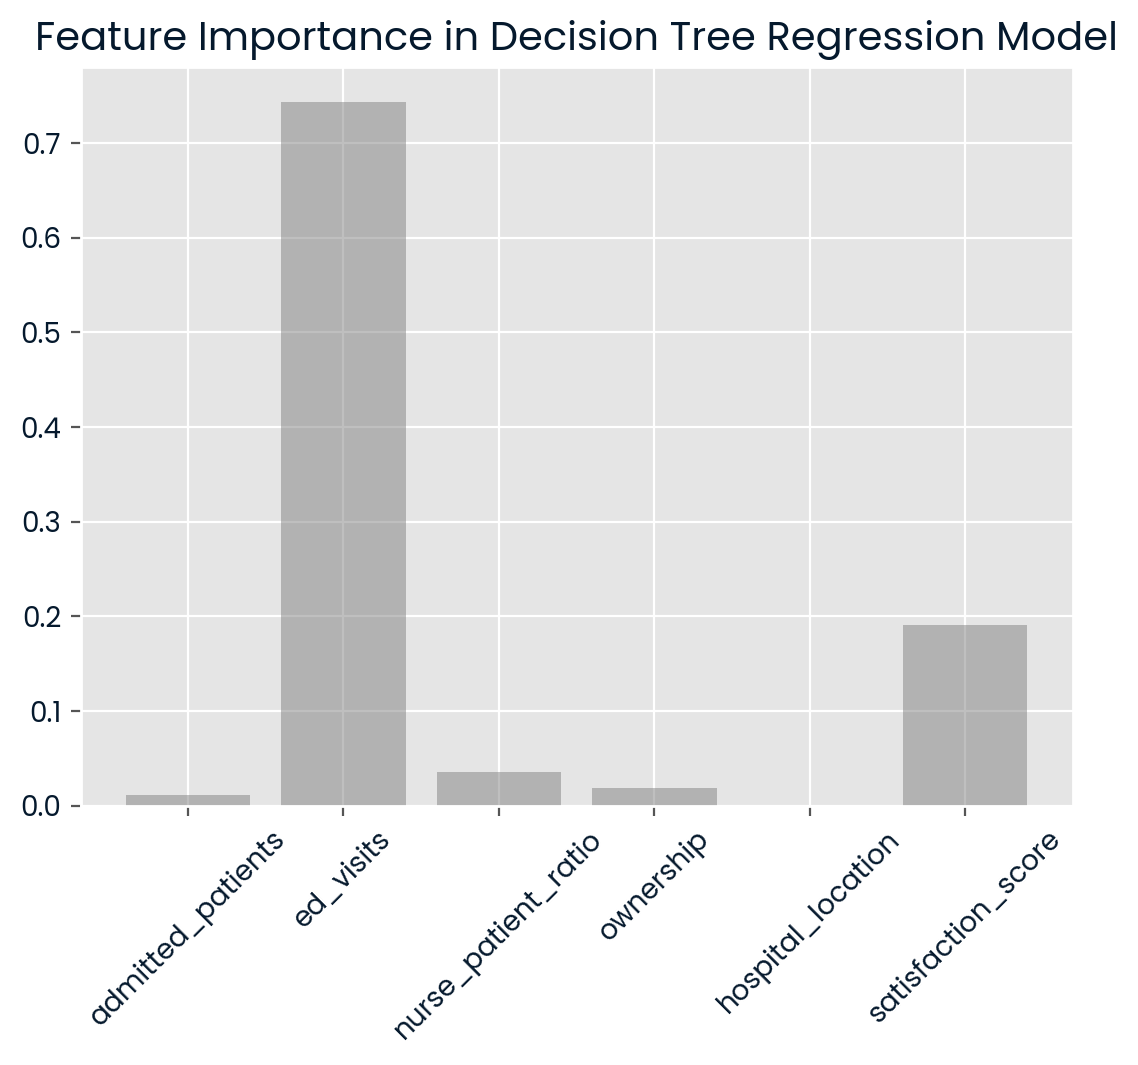

In [18]:
tree = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)
d_r2 = tree.score(X_test, y_test)


print("Decision Tree Regressor R-squared: {}".format(d_r2))

d_mse = mean_squared_error(y_test,y_pred2)
d_rmse = np.sqrt(d_mse)
Decision_r2 = r2_score(y_test, y_pred2)
print("Decision Tree Regressor RMSE: {}".format(d_rmse))
print("R-squared:", Decision_r2)


importance = tree.feature_importances_
new_column_names=['admitted_patients','ed_visits','nurse_patient_ratio','ownership','hospital_location','satisfaction_score']
f_importance = {}
for i in range(len(feature_cols)):
     f_importance[new_column_names[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values(),alpha=0.5,color='gray')
plt.xticks(rotation=45)
plt.title('Feature Importance in Decision Tree Regression Model');


## Results
The R squared of the Linear Regression, and the Decision Tree Regression model is 0.2395 and 0.1669, meaning the Linear Regression model fits the features better. The MSE of the Linear Regression, and the Random Forest Regression model is 635764745.64 and 696396191.009, meaning the Linear Regression model is more accurate in predicting values. The MAE of the Linear Regression and the Random Forest Model is 21916.088 and 22611.57, reinforcing that the Linear Regression model is more accurate.

### Evaluate by Business Criteria
The company wants to avoid prediction out of a range - within 10% of the actual revenue. Therefore, we would consider using percentage of predictions within 10% of the actual revenue as a KPI to compare the two models again. The higher the percentage, the better the model performs. 19.849% of the linear regression predictions are within 10% of the actual revenue, while the decision tree model only has 18.341%.

### Recommendations
Given the findings through this analysis, there are various ways FMPF Medical Group can approach their next steps. Specifically, I recommend:
- Focusing on opportunities that track ED visits as that most directly correlates to increased revenue
- Standardizing the method in which they collect data across locations, potentially considering a web application
- Continue testing the linear regression model by comparing its predictions of revenue to actuals as more data becomes available
- Continuously improve the model by collecting more data and training the model on the latest

